In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

c:\Users\luisl\anaconda3\envs\PythonData\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Business Questions:


Descriptive Analytics

    Sales Analysis: What are the total sales for each product category across different channels and regions? This involves summarizing current sales data to understand what products are performing well.
    Customer Segmentation: How do customers differ in their spending across different product categories? This can involve cluster analysis to identify different types of customers based on their purchasing patterns.
    Market Analysis: What are the differences in purchasing patterns across regions? Are there specific product categories that are more popular in certain regions?

Inferential Analytics

    Comparative Analysis: Is there a significant difference in the average spending on different product categories between the two channels? This could involve hypothesis testing to compare means across groups.
    Association Rules: Are there certain products that are frequently bought together? This could involve using market basket analysis to find associations between different products.
    Regional Preferences: Are there significant differences in purchasing habits across different regions? This could involve statistical tests to compare regional data.

Predictive Analytics

    Sales Forecasting: Can we predict future sales for each product category based on historical data? This would involve using time series analysis or machine learning models for sales forecasting.
    Customer Spending Prediction: Can we predict how much a new customer will spend in each category based on their demographics or initial purchases? This involves building a predictive model.
    Churn Prediction: Can we predict which customers are likely to stop buying (churn) based on their purchasing patterns? This involves identifying patterns that precede churn and building a predictive model.

In [2]:
df = pd.read_csv('wholesale.csv')
df.head(2)

(df.sum() / df.sum().sum()) * 100

Channel              0.003981
Region               0.007653
Fresh               36.112841
Milk                17.442869
Grocery             23.928007
Frozen               9.244453
Detergents_Paper     8.671360
Delicassen           4.588836
dtype: float64

Looks like the top selling products are Fresh, Milk and Groceries. Numbers are expenditure of clients in monetary units

## Descriptive Statistics

## Probability

## Sampling Distributions

### Studying the confidence interval of the major products consumed

#### Starting with Fresh

<Figure size 432x504 with 0 Axes>

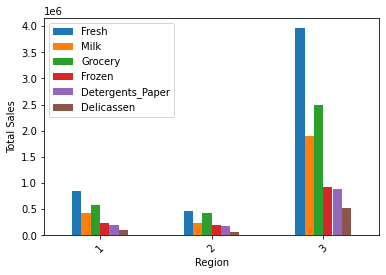

In [3]:
plt.figure(figsize=(6,7))
df.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']].sum().plot(kind='bar')
plt.xticks(rotation = 45)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show();

In [23]:
consumption_region = df.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']].sum()
consumption_region.sum(axis=1)


Region
1     2386813
2     1555088
3    10677599
dtype: int64

I want to start by finding out what is the  current mean and standard deviation of the fresh column

In [5]:
fresh_mean = df['Fresh'].mean()
fresh_sd = df['Fresh'].std()
fresh_mean, fresh_sd

(12000.297727272728, 12647.328865076894)

<AxesSubplot:xlabel='Fresh', ylabel='Count'>

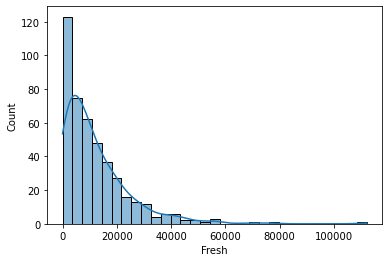

In [24]:
sns.histplot(df['Fresh'], kde=True)

We can see that our intial representation of the fresh column resembles more of the gamma function. We need to include high values becasue these are totals of product consumers purchased. So it looks like the data is representing the aggregation of product bought

In [6]:
#Calculating shape and scale parameter
k_shape = fresh_mean**2 / fresh_sd**2
lambda_scale = fresh_sd / k_shape
k_shape,lambda_scale
# Recalculating with the correct understanding
variance_gamma = fresh_sd**2  # Variance is the square of the standard deviation

# Shape parameter (k)
k_gamma = fresh_mean**2 / variance_gamma

# Scale parameter (theta)
theta_gamma = variance_gamma / fresh_mean

(k_gamma, theta_gamma)



(0.9002982769251917, 13329.246578431324)

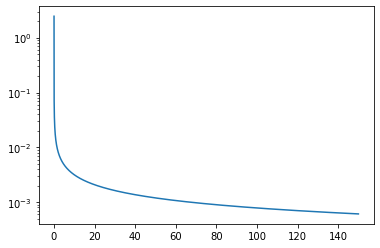

In [61]:
x = np.linspace (0, 150, 1000000) # This is creating the x-scale starting from 0 to 150 and simulating 10,000 samples
y = stats.gamma.pdf(x, a= k_gamma, scale=theta_gamma)#
plt.yscale('log')
plt.plot(x,y)


In [25]:
# Number of samples per mean calculation and number of means to generate
num_samples_per_mean = 100
num_means = 1000000
# Generate random samples and calculate means
means = [np.random.gamma(k_gamma, theta_gamma, num_samples_per_mean).mean() for _ in range(num_means)]

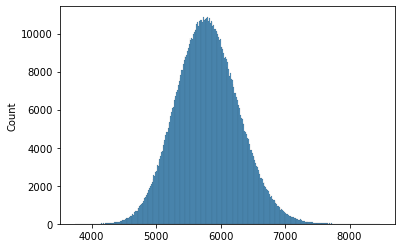

In [26]:
sns.histplot(means)
plt.show();

In [29]:
sample_sd = np.std(means)
fresh_se = sample_sd / np.sqrt(df['Fresh'].shape[0])
lower = fresh_mean - 1.96*fresh_se
upper = fresh_mean + 1.96*fresh_se
lower , upper
print(f'We are 95% confident that in the lon-run, the consumption of Fresh food will remain between {round(lower,2),round(upper,2)} monetary units  ')

We are 95% confident that in the lon-run, the consumption of Fresh food will remain between (11954.98, 12045.62) monetary units  


#### Milk

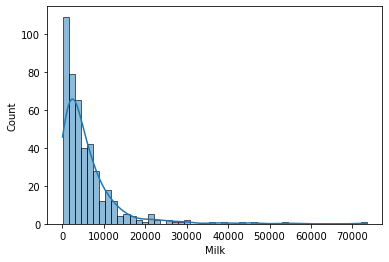

Wee see, that milk also resembles the exponential function or the gamma function as the Fresh produce section


In [14]:
sns.histplot(df['Milk'], kde=True)
plt.show();
print('Wee see, that milk also resembles the exponential function or the gamma function as the Fresh produce section')

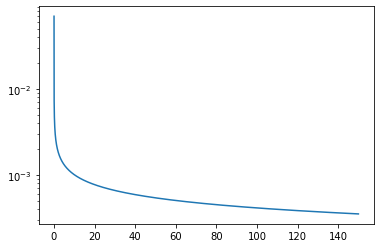

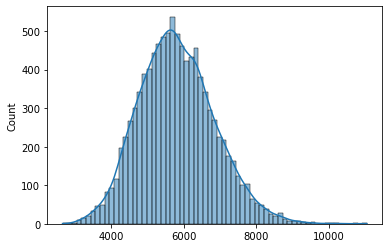

We are 95% confident that Milk customer expidenture will fall bewteen (5699.35, 5893.18), while the mean is 5796.27


In [63]:
#Calculating Parameters
milk_mean = np.mean(df['Milk'])
milk_st =np.std(df['Milk'])
milk_n = df.shape[0]



# Calculating the shape and scale parameters for milk

variance_gamma = milk_st**2  # Variance is the square of the standard deviation

# Shape parameter (k)
k_gamma = milk_mean**2 / variance_gamma

# Scale parameter (theta)
theta_gamma = variance_gamma / milk_mean

# Number of samples per mean calculation and number of means to generate

x = np.linspace (0, 150, 1000000) # This is creating the x-scale starting from 0 to 150 and simulating 10,000 samples
y = stats.gamma.pdf(x, a= k_gamma, scale=theta_gamma)#
plt.yscale('log')
plt.plot(x,y)
plt.show();

num_samples_per_mean = 50
num_means = 10000

# Generate random samples and calculate means
means = [np.random.gamma(k_gamma, theta_gamma, num_samples_per_mean).mean() for _ in range(num_means)]


#Calculating the standard error from the sample

sample_milk_sd = np.std(means)
milk_se = sample_milk_sd / np.sqrt(milk_n)

#Plotting The distribution
sns.histplot(means,kde=True)
plt.show();


lower = milk_mean - 1.96*milk_se
upper = milk_mean + 1.96*milk_se
lower , upper

print(f'We are 95% confident that Milk customer expidenture will fall bewteen {round(lower,2),round(upper,2)}, while the mean is {round(milk_mean,2)}')

### We will analyze 'Frozen' Foods

<AxesSubplot:xlabel='Frozen', ylabel='Count'>

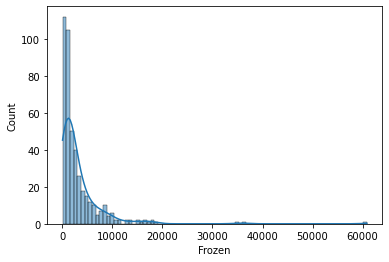

In [33]:
sns.histplot(df['Frozen'], kde=True)

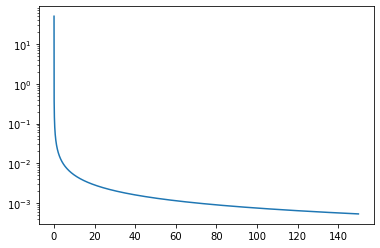

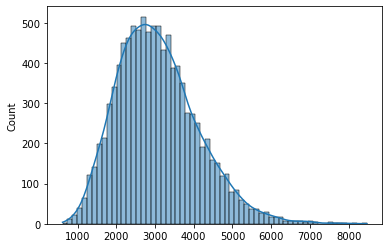

We are 95% confident that Milk customer expidenture will fall bewteen (2974.85, 3169.01), while the mean is 3071.93


In [64]:
#Calculating Parameters
frozen_mean = np.mean(df['Frozen'])
frozen_st =np.std(df['Frozen'])
frozen_n = df.shape[0]



# Calculating the shape and scale parameters for frozen

variance_gamma = milk_st**2  # Variance is the square of the standard deviation

# Shape parameter (k)
k_gamma = frozen_mean**2 / variance_gamma

# Scale parameter (theta)
theta_gamma = variance_gamma / frozen_mean

x = np.linspace (0, 150, 1000000) # This is creating the x-scale starting from 0 to 150 and simulating 10,000 samples
y = stats.gamma.pdf(x, a= k_gamma, scale=theta_gamma)#
plt.yscale('log')
plt.plot(x,y)
plt.show();


# Number of samples per mean calculation and number of means to generate
num_samples_per_mean = 50
num_means = 10000

# Generate random samples and calculate means
means = [np.random.gamma(k_gamma, theta_gamma, num_samples_per_mean).mean() for _ in range(num_means)]


#Calculating the standard error from the sample

sample_frozen_sd = np.std(means)
frozen_se = sample_frozen_sd / np.sqrt(frozen_n)

#Plotting The distribution
sns.histplot(means,kde=True)
plt.show();


lower = frozen_mean - 1.96*frozen_se
upper = frozen_mean + 1.96*frozen_se
lower , upper
print(f'We are 95% confident that frozen customer expidenture will fall bewteen {round(lower,2),round(upper,2)}, while the mean is {round(frozen_mean,2)}')

### Detergent and Paper

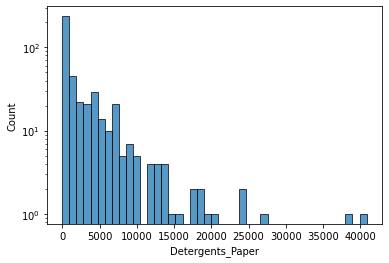

In [60]:
sns.histplot(df['Detergents_Paper'])
plt.yscale('log')

In [44]:
df['Detergents_Paper']

118    2
955    2
256    2
69     2
918    2
      ..
516    1
399    1
51     1
960    1
477    1
Name: Detergents_Paper, Length: 417, dtype: int64